In [1]:
import numpy as np
import pandas as pd



In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_excel('NewData.xlsx')


In [4]:
df.head()

,Education,Region,Gender,Exp,Union,Wage,Age,Race,Occupation,Sector,Married
0,9,0,1,42,0,4.95,57,3,6,1,1
1,12,0,0,1,0,6.67,19,3,6,1,0
2,12,0,0,4,0,4.00,22,3,6,0,0
3,12,0,0,17,0,7.50,35,3,6,0,1
4,13,0,0,9,1,13.07,28,3,6,0,0


In [5]:
mydf = df[['Education','Gender','Exp','Age','Occupation','Wage']]


In [6]:
mydf.head()

,Education,Gender,Exp,Age,Occupation,Wage
0,9,1,42,57,6,4.95
1,12,0,1,19,6,6.67
2,12,0,4,22,6,4.00
3,12,0,17,35,6,7.50
4,13,0,9,28,6,13.07


In [7]:
gender_dummy = pd.get_dummies(mydf['Gender'], drop_first=True)


In [8]:
mydf = mydf.drop('Gender', axis=1)


In [9]:
mydf = pd.concat([mydf, gender_dummy], axis=1)


In [10]:
mydf.head()

,Education,Exp,Age,Occupation,Wage,1
0,9,42,57,6,4.95,1
1,12,1,19,6,6.67,0
2,12,4,22,6,4.00,0
3,12,17,35,6,7.50,0
4,13,9,28,6,13.07,0


In [11]:
occ_dummy = pd.get_dummies(mydf['Occupation'], drop_first=True)



In [12]:
mydf = mydf.drop('Occupation', axis=1)


In [13]:
mydf = pd.concat([mydf, occ_dummy], axis=1)


In [14]:
mydf.head()

,Education,Exp,Age,Wage,1,2,3,4,5,6
0,9,42,57,4.95,1,0,0,0,0,1
1,12,1,19,6.67,0,0,0,0,0,1
2,12,4,22,4.00,0,0,0,0,0,1
3,12,17,35,7.50,0,0,0,0,0,1
4,13,9,28,13.07,0,0,0,0,0,1


In [15]:
x_train = mydf.drop('Wage',axis=1)


In [17]:
x_train.head()

,Education,Exp,Age,1,2,3,4,5,6
0,9,42,57,1,0,0,0,0,1
1,12,1,19,0,0,0,0,0,1
2,12,4,22,0,0,0,0,0,1
3,12,17,35,0,0,0,0,0,1
4,13,9,28,0,0,0,0,0,1


In [18]:
y_train = mydf.Wage


In [19]:
y_train.head()

0     4.95
1     6.67
2     4.00
3     7.50
4    13.07
Name: Wage, dtype: float64

In [20]:
x_train = sm.add_constant(x_train)


In [21]:
x_train.head()

,const,Education,Exp,Age,1,2,3,4,5,6
0,1.0,9,42,57,1,0,0,0,0,1
1,1.0,12,1,19,0,0,0,0,0,1
2,1.0,12,4,22,0,0,0,0,0,1
3,1.0,12,17,35,0,0,0,0,0,1
4,1.0,13,9,28,0,0,0,0,0,1


In [22]:
mod1 = sm.OLS(y_train, x_train).fit()


In [24]:
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     25.02
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           8.66e-36
Time:                        10:25:15   Log-Likelihood:                -1533.0
No. Observations:                 533   AIC:                             3086.
Df Residuals:                     523   BIC:                             3129.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7072      6.748      0.253      0.8

In [25]:
for i in range(mydf.shape[1]):
    print('column',i,'has the VIF factor of',variance_inflation_factor(mydf.values,i))


column 0 has the VIF factor of 678.3585921777075
column 1 has the VIF factor of 1082.2476803959487
column 2 has the VIF factor of 3237.2994844699547
column 3 has the VIF factor of 5.8526054739991595
column 4 has the VIF factor of 2.3546991455079924
column 5 has the VIF factor of 1.7778207295965034
column 6 has the VIF factor of 3.1114643593021385
column 7 has the VIF factor of 2.9572756152578483
column 8 has the VIF factor of 2.9738246542948303
column 9 has the VIF factor of 4.642251365655381


In [26]:
mydf.head()

,Education,Exp,Age,Wage,1,2,3,4,5,6
0,9,42,57,4.95,1,0,0,0,0,1
1,12,1,19,6.67,0,0,0,0,0,1
2,12,4,22,4.00,0,0,0,0,0,1
3,12,17,35,7.50,0,0,0,0,0,1
4,13,9,28,13.07,0,0,0,0,0,1


In [27]:
newdf = mydf.drop('Age',axis=1)


In [28]:
for i in range(newdf.shape[1]):
    print('column',i,'has the VIF factor of',variance_inflation_factor(newdf.values,i))


column 0 has the VIF factor of 13.214626729086056
column 1 has the VIF factor of 3.074111023994199
column 2 has the VIF factor of 5.848312723908722
column 3 has the VIF factor of 2.317286928376284
column 4 has the VIF factor of 1.578467452860891
column 5 has the VIF factor of 2.559259070879
column 6 has the VIF factor of 2.120116050123338
column 7 has the VIF factor of 2.9114826998452235
column 8 has the VIF factor of 2.723560087849334


In [29]:
newdf.head()

,Education,Exp,Wage,1,2,3,4,5,6
0,9,42,4.95,1,0,0,0,0,1
1,12,1,6.67,0,0,0,0,0,1
2,12,4,4.00,0,0,0,0,0,1
3,12,17,7.50,0,0,0,0,0,1
4,13,9,13.07,0,0,0,0,0,1


In [30]:
newdf1 = mydf.drop('Education',axis=1)

In [31]:
newdf1.head()

,Exp,Age,Wage,1,2,3,4,5,6
0,42,57,4.95,1,0,0,0,0,1
1,1,19,6.67,0,0,0,0,0,1
2,4,22,4.00,0,0,0,0,0,1
3,17,35,7.50,0,0,0,0,0,1
4,9,28,13.07,0,0,0,0,0,1


In [33]:
for i in range(newdf1.shape[1]):
    print('column',i,'has the VIF factor of',variance_inflation_factor(newdf1.values,i))


column 0 has the VIF factor of 23.34350770231345
column 1 has the VIF factor of 63.063554867351215
column 2 has the VIF factor of 5.827452860809109
column 3 has the VIF factor of 2.3357587333402923
column 4 has the VIF factor of 1.6497191241923805
column 5 has the VIF factor of 2.7322618872244444
column 6 has the VIF factor of 2.3157320556484824
column 7 has the VIF factor of 2.961704035031646
column 8 has the VIF factor of 3.114668378759307


In [37]:
newdf2 = mydf.drop('Exp',axis=1)

In [38]:
newdf2.head()

,Education,Age,Wage,1,2,3,4,5,6
0,9,57,4.95,1,0,0,0,0,1
1,12,19,6.67,0,0,0,0,0,1
2,12,22,4.00,0,0,0,0,0,1
3,12,35,7.50,0,0,0,0,0,1
4,13,28,13.07,0,0,0,0,0,1


In [39]:
for i in range(newdf2.shape[1]):
    print('column',i,'has the VIF factor of',variance_inflation_factor(newdf2.values,i))


column 0 has the VIF factor of 14.631834568254446
column 1 has the VIF factor of 9.19550876703184
column 2 has the VIF factor of 5.8519710725555205
column 3 has the VIF factor of 2.3232019880218138
column 4 has the VIF factor of 1.590483524774023
column 5 has the VIF factor of 2.5844615993662075
column 6 has the VIF factor of 2.162376434360275
column 7 has the VIF factor of 2.9159268651263064
column 8 has the VIF factor of 2.8008189663586105


In [40]:
x_train = newdf.drop('Wage',axis=1)


In [41]:
x_train = sm.add_constant(x_train)


In [42]:
y_train = newdf.Wage


In [43]:
mod2 = sm.OLS(y_train, x_train).fit()


In [44]:
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     28.20
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           1.58e-36
Time:                        11:05:10   Log-Likelihood:                -1533.0
No. Observations:                 533   AIC:                             3084.
Df Residuals:                     524   BIC:                             3123.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1325      1.705      0.664      0.5

In [45]:
'''
old mod1 without multicollenrity =wages do not depend on Edu ,Exp,Age;depends on gender and type of occupation
new mod2 with multicollinearity = wages depends on Edu ,Exp;rest is same
'''


'\nold mod1 without multicollenrity =wages do not depend on Edu ,Exp,Age;depends on gender and type of occupation\nnew mod2 with multicollinearity = wages depends on Edu ,Exp;rest is same\n'

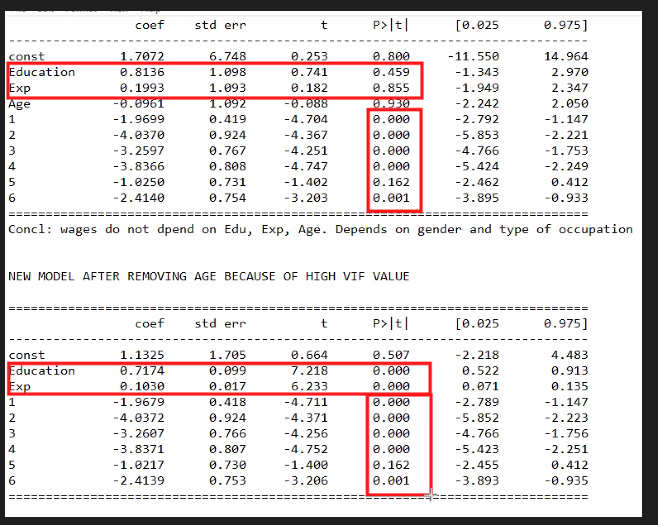

In [48]:
#So our work is to provide these statistical number & decision would be made by the domain experts.
#


# Overfitting
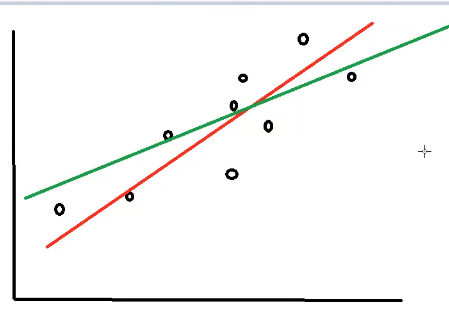    ==  red is better fitting
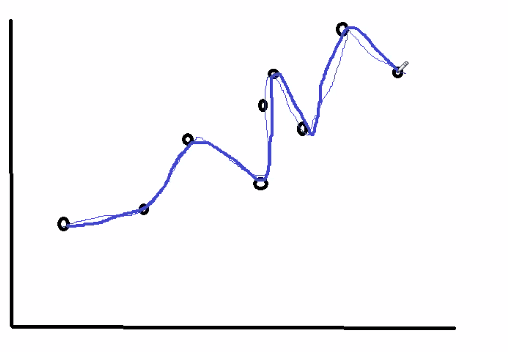        ==   Overfitting (like Rahul in Arnab's interview)


# Decision Tree
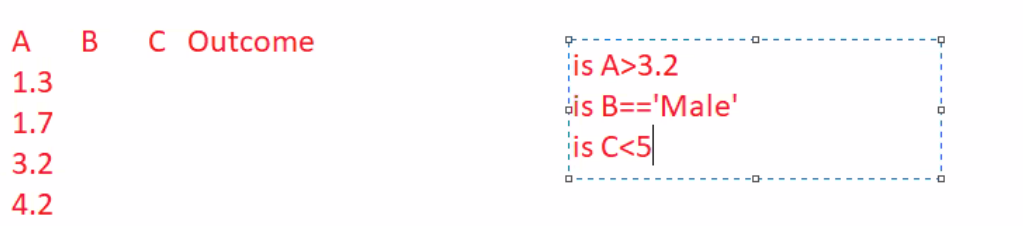
# questions are decided such that we get the highest purity of discrimination
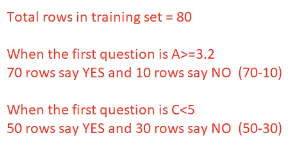

#one team is dominating other . so it's easy to guess in case of 70:10


# Standard deviation for proportions
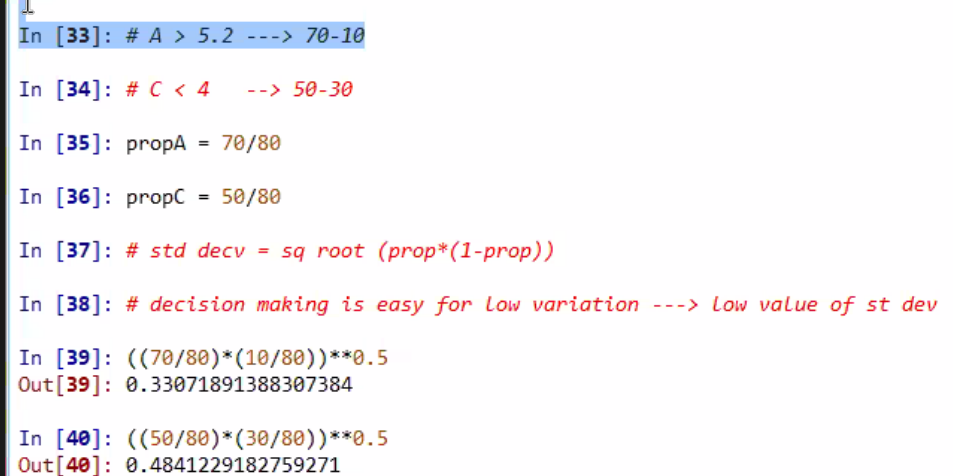

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd


In [5]:
df = pd.read_excel('CDAC_DataBook.xlsx', sheet_name = 'iris')

In [6]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report


In [7]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Species',axis=1), df['Species'], test_size=0.2)


In [8]:
mod1 = DecisionTreeClassifier()


In [9]:
mod1.fit(x_train, y_train)


DecisionTreeClassifier()

In [10]:
y_pred = mod1.predict(x_test)

In [11]:
print(confusion_matrix(y_test,y_pred))

[[ 7  0  0]
 [ 0  7  3]
 [ 0  0 13]]


In [13]:
pip install pydot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
!pip install pydotplus


Defaulting to user installation because normal site-packages is not writeable


In [26]:
export_graphviz(mod1, out_file='MyFile.dot')

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [19]:
mod1 = DecisionTreeClassifier(max_depth=3)
#limits the number of splits to get the terminal leaf


In [104]:
mod1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [14]:
from sklearn.tree import export_graphviz

In [16]:
export_graphviz(mod1, out_file='MyFile.dot')
#http://www.webgraphviz.com/ (generating decision tree)

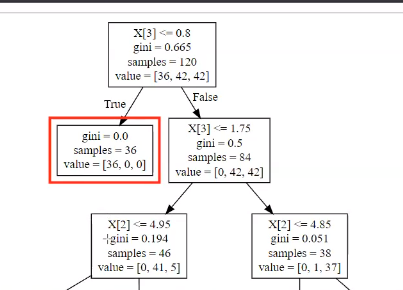

In [25]:
mod1 = DecisionTreeClassifier(min_sample_leaf=3)

TypeError: __init__() got an unexpected keyword argument 'min_sample_leaf'

# Decision tree and Decision forest
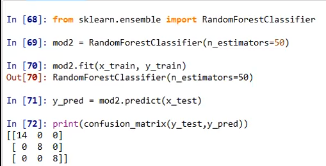
#diagonal gives where prediction matches the actual value

In [22]:
from sklearn.ensemble import RandomForestClassifier
mod2 = RandomForestClassifier(n_estimators=50)

mod2.fit(x_train, y_train)


RandomForestClassifier(n_estimators=50)

In [23]:
y_predict =mod2.predict(x_test)

In [24]:
print(confusion_matrix(y_test,y_predict))
#diagonal gives where prediction matches the actual value

[[ 7  0  0]
 [ 0  7  3]
 [ 0  0 13]]


# Naïve Bayes Classifier

In [111]:
'''
P(A|B) was being calculated when P(B|A) is known
A - covid positive
B - report positive
works on Bayes theorem
prior probabilities
posterior probabilities
'''

'\nNaïve Bayes Classifier\nP(A|B) was being calculated when P(B|A) is known\nA - covid positive\nB - report positive\nworks on Bayes theorem\nprior probabilities\nposterior probabilities\n'

In [112]:
from sklearn.naive_bayes import GaussianNB


In [113]:
mod4 = GaussianNB().fit(x_train, y_train)


In [114]:
y_pred = mod4.predict(x_test)


In [115]:
print(confusion_matrix(y_test, y_pred))


[[ 8  0  0]
 [ 0  9  2]
 [ 0  1 10]]


# KNN classifier
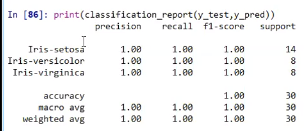

In [118]:
#KNN classifier
#NN stands for nearest neighbours
#K - number that we decide upon, suppose we decide K = 5


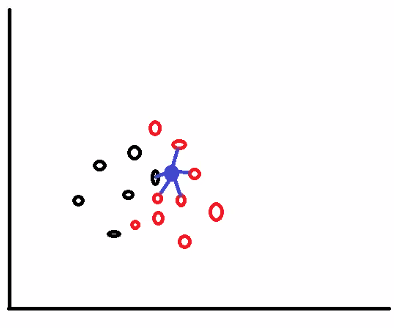

In [119]:
from sklearn.neighbors import KNeighborsClassifier


In [120]:
mod5 = KNeighborsClassifier(n_neighbors=7).fit(x_train, y_train)


In [121]:
y_pred = mod5.predict(x_test)


C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
print(confusion_matrix(y_test, y_pred))


[[ 7  0  0]
 [ 0  7  3]
 [ 0  0 13]]
